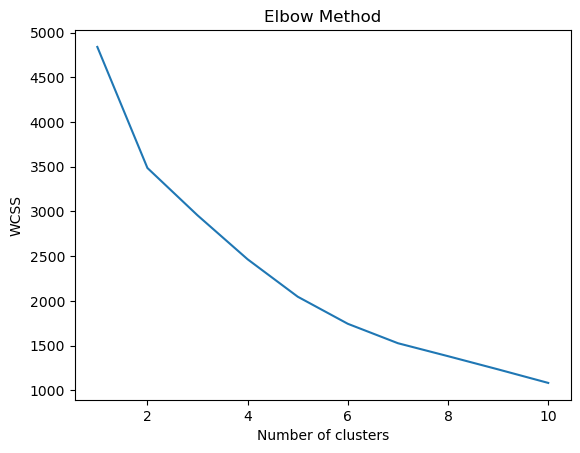

/Users/alkis/miniconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/alkis/miniconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/alkis/miniconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/alkis/miniconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/alkis/minicon

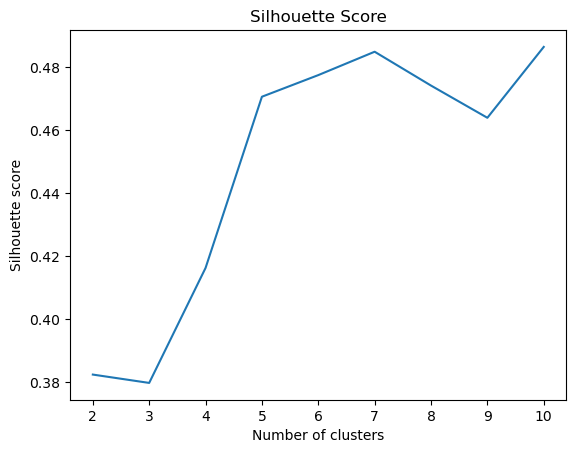

/Users/alkis/miniconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score:  0.4706106938290522


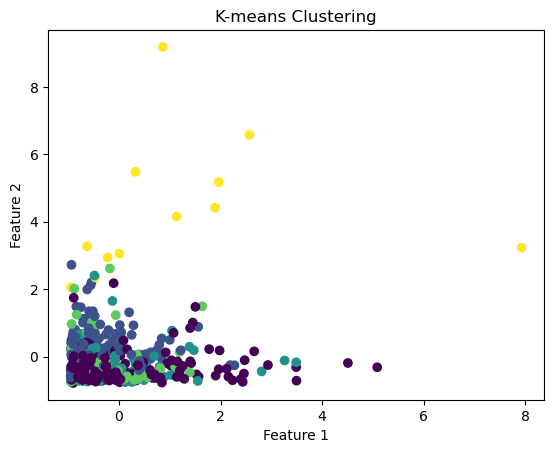

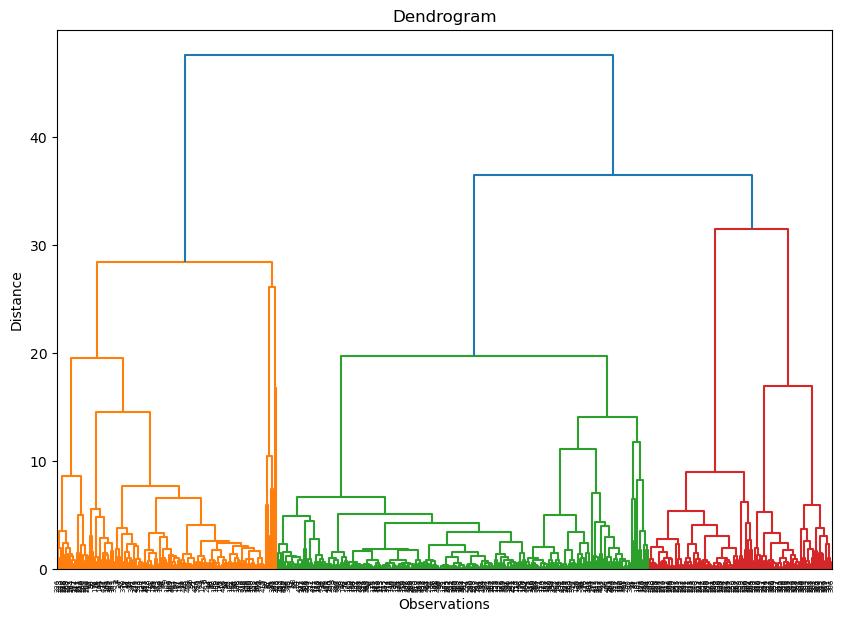

Silhouette Score Hierarchical:  0.46240458722459143


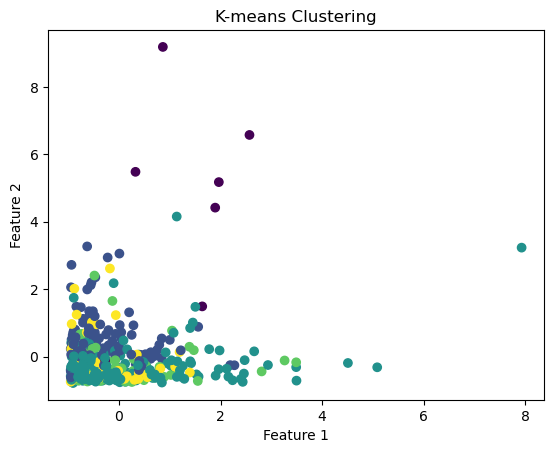

Number of data points in each cluster for DBSCAN:
 [260 130   5   5   7  22   6   5]
Silhouette score for DBSCAN: -0.09128305436992806


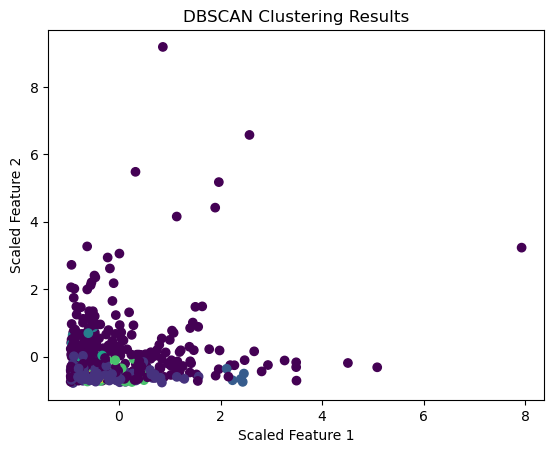

In [1]:
# -*- coding: utf-8 -*-
"""
Created on Sun Apr  9 09:40:11 2023

@author: KMarg
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage


# Load the dataset
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00292/Wholesale%20customers%20data.csv'
data = pd.read_csv(url, header=0, delimiter=',')

# Identify categorical columns and apply one-hot encoding
cat_cols = ['Channel', 'Region']
encoder = OneHotEncoder()
X_cat = data[cat_cols].astype('category')
X_cat_encoded = encoder.fit_transform(X_cat)
X_num = data.drop(cat_cols, axis=1)
X_norm = np.hstack((X_num, X_cat_encoded.toarray()))

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_norm)

# Elbow method to determine the optimal number of clusters for K-means
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Silhouette score to evaluate the clustering quality for K-means
sil_scores = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    labels = kmeans.labels_
    sil_scores.append(silhouette_score(X_scaled, labels))
plt.plot(range(2, 11), sil_scores)
plt.title('Silhouette Score')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.show()

# Run K-means with the optimal number of clusters
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X_scaled)
labels_kmeans = kmeans.labels_

from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Calculate silhouette score
sil_score = silhouette_score(X_scaled, labels_kmeans, metric='euclidean')
print('Silhouette Score: ', sil_score)

# Visualize the clustering solution
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels_kmeans)
plt.title('K-means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

# Run hierarchical clustering
ward = linkage(X_scaled, method='ward')
plt.figure(figsize=(10, 7))
dendrogram(ward)
plt.title("Dendrogram")
plt.xlabel("Observations")
plt.ylabel("Distance")
plt.show()

# Cut the dendrogram to obtain the optimal number of clusters for hierarchical clustering
cut_tree = AgglomerativeClustering(n_clusters=5)
labels_agg = cut_tree.fit_predict(X_scaled)

# Calculate silhouette score
sil_score = silhouette_score(X_scaled, labels_agg, metric='euclidean')
print('Silhouette Score Hierarchical: ', sil_score)

# Visualize the clustering solution
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels_agg)
plt.title('K-means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

# Run DBSCAN with default hyperparameters
# Run DBSCAN with default hyperparameters
dbscan = DBSCAN()
labels_dbscan = dbscan.fit_predict(X_scaled)

# Check for negative labels and handle appropriately
if np.any(labels_dbscan < 0):
    # Exclude noise points from cluster count
    labels_dbscan[labels_dbscan < 0] = 0
    print("Number of data points in each cluster for DBSCAN:\n", np.bincount(labels_dbscan, minlength=0))
else:
    print("Number of data points in each cluster for DBSCAN:\n", np.bincount(labels_dbscan))
    
# Evaluate clustering quality using silhouette score for DBSCAN
sil_score_dbscan = silhouette_score(X_scaled, labels_dbscan)
print("Silhouette score for DBSCAN:", sil_score_dbscan)

#Plot the DBSCAN results
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels_dbscan, cmap='viridis')
plt.title("DBSCAN Clustering Results")
plt.xlabel("Scaled Feature 1")
plt.ylabel("Scaled Feature 2")
plt.show()



No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


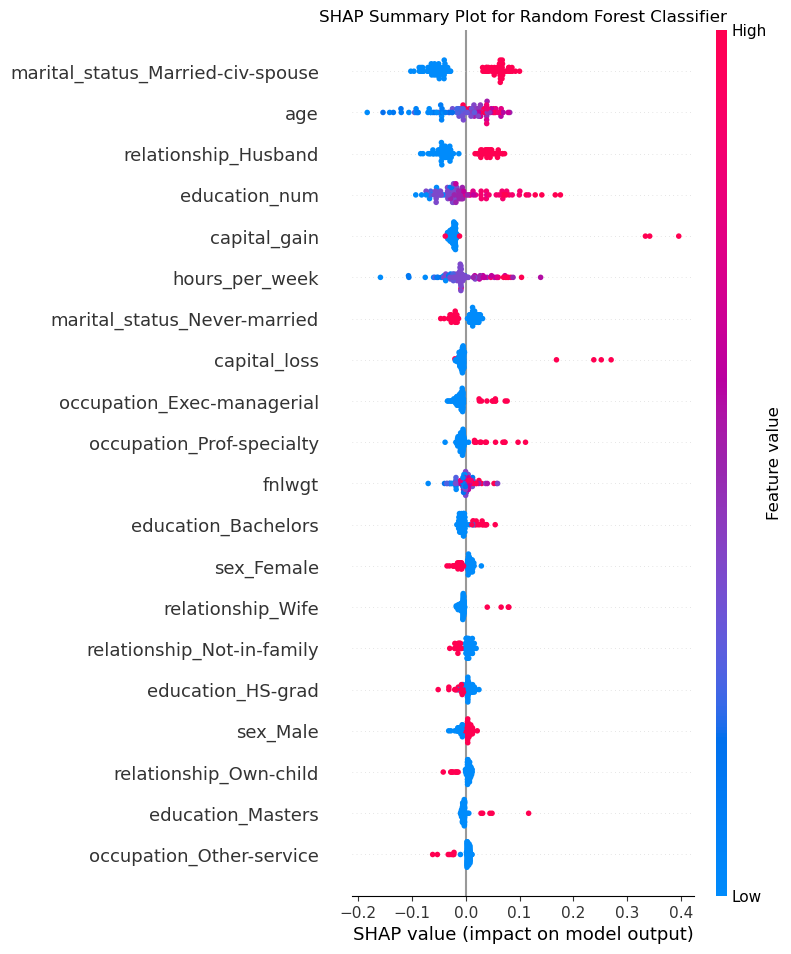

In [3]:
# define feature names (replace with your own feature names)
feature_names = col_names

sample = X_test.sample(100, random_state=42)
# SHAP for Random Forest Classifier
explainer = shap.TreeExplainer(rfc)
shap_values = explainer.shap_values(sample)

shap.summary_plot(shap_values[1], sample, show=False)
plt.title('SHAP Summary Plot for Random Forest Classifier')
plt.show()

# # SHAP for Neural Network
# explainer = shap.KernelExplainer(nn.predict_proba, X_train)
# shap_values = explainer.shap_values(sample, nsamples=100)

# shap.summary_plot(shap_values[1], sample, show=False)
# plt.title('SHAP Summary Plot for Neural Network')
# plt.show()

# # SHAP for Decision Tree
# explainer = shap.TreeExplainer(tree)
# shap_values = explainer.shap_values(sample)

# shap.summary_plot(shap_values, sample, show=False)
# plt.title('SHAP Summary Plot for Decision Tree')
# plt.show()

# # SHAP for KNN Classifier
# explainer = shap.KernelExplainer(knn.predict_proba, X_train)
# shap_values = explainer.shap_values(sample, nsamples=100)

# shap.summary_plot(shap_values[1], sample, show=False)
# plt.title('SHAP Summary Plot for KNN Classifier')
# plt.show()

In [ ]:
# SHAP for Decision Tree
explainer = shap.TreeExplainer(tree)
shap_values = explainer.shap_values(sample)

shap.summary_plot(shap_values, sample, show=False)
plt.title('SHAP Summary Plot for Decision Tree')
plt.show()

X does not have valid feature names, but MLPClassifier was fitted with feature names


  0%|          | 0/100 [00:00<?, ?it/s]

X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted

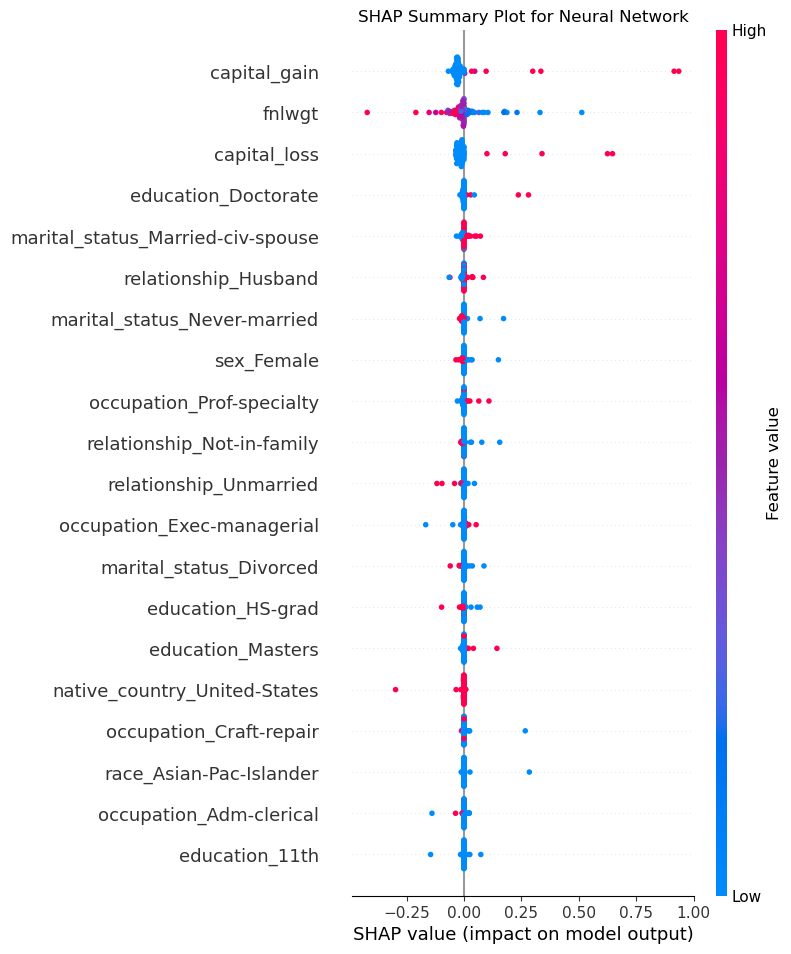

In [7]:
#sample = X_train.sample(100, random_state=42)


# SHAP for Neural Network
explainer = shap.KernelExplainer(nn.predict_proba, X_train.sample(100, random_state=42))
shap_values = explainer.shap_values(sample, nsamples=100)

shap.summary_plot(shap_values[1], sample, show=False)
plt.title('SHAP Summary Plot for Neural Network')
plt.show()

X does not have valid feature names, but KNeighborsClassifier was fitted with feature names


  0%|          | 0/100 [00:00<?, ?it/s]

X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
X does not have valid feature names, but KNeighborsClassifier was fitted with fe

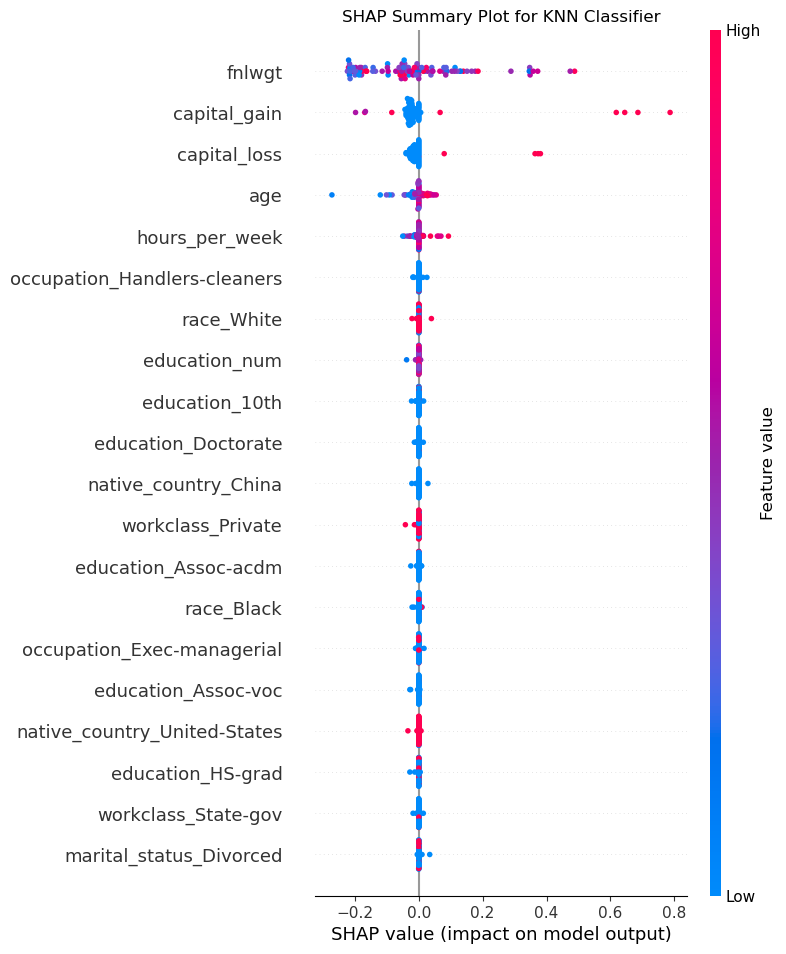

In [10]:

# SHAP for KNN Classifier
explainer = shap.KernelExplainer(knn.predict_proba, X_train.sample(50, random_state=42))
shap_values = explainer.shap_values(sample, nsamples=50)

shap.summary_plot(shap_values[1], sample, show=False)
plt.title('SHAP Summary Plot for KNN Classifier')
plt.show()